In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [9]:
assets = ['TCS.BO','RELIANCE.BO','SBIN.BO','LT.BO','HINDUNILVR.BO']
start_date = '2014-01-01'
end_date = '2023-12-31'
portfolio_data = yf.download(assets, start = start_date, end = end_date)['Adj Close']

[*********************100%%**********************]  5 of 5 completed


In [10]:
portfolio_data

Ticker,HINDUNILVR.BO,LT.BO,RELIANCE.BO,SBIN.BO,TCS.BO
Date,,,,,
2014-01-01,518.024902,657.243225,408.773895,142.588120,851.957153
2014-01-02,509.826050,637.259766,402.633270,140.746475,855.359192
2014-01-03,512.136230,622.410461,397.872620,138.614105,878.975220
2014-01-06,510.732056,621.826294,393.226959,136.316101,885.937561
2014-01-07,506.700470,626.591431,387.362366,134.062546,873.516602
...,...,...,...,...,...
2023-12-22,2550.255371,3449.189941,2564.699951,626.148438,3797.697266
2023-12-26,2560.802734,3461.989258,2577.500000,627.426941,3767.218750
2023-12-27,2584.075928,3515.965088,2586.350098,637.655396,3783.301758


  EQUAL WEIGHTED PORTFOLIO

In [13]:
def equal_weighted_portfolio (portfolio_data):
    num_assets = len(portfolio_data.columns)
    weights = np.ones(num_assets)/num_assets
    equal_weighted_returns = portfolio_data.pct_change().dot(weights)
    return equal_weighted_returns

In [17]:
equal_weighted_returns = equal_weighted_portfolio (portfolio_data)
equal_weighted_returns

Date
2014-01-01         NaN
2014-01-02   -0.014035
2014-01-03   -0.003627
2014-01-06   -0.004803
2014-01-07   -0.009139
                ...   
2023-12-22    0.004522
2023-12-26    0.001371
2023-12-27    0.009737
2023-12-28    0.002284
2023-12-29   -0.001988
Length: 2444, dtype: float64

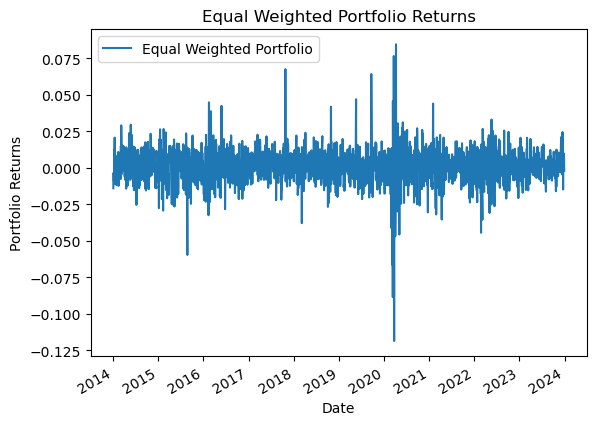

In [19]:
equal_weighted_returns.plot(label = 'Equal Weighted Portfolio')
plt.title('Equal Weighted Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Portfolio Returns')
plt.legend()
plt.show()

MARKET CAP WEIGHTED PORTFOLIO

In [21]:
def market_cap_weighted_portfolio (portfolio_data):
    market_caps = portfolio_data.iloc[-1]
    weights = market_caps/market_caps.sum()
    market_cap_returns = portfolio_data.pct_change().dot(weights)
    return market_cap_returns

In [22]:
market_cap_returns = market_cap_weighted_portfolio (portfolio_data)
market_cap_returns

Date
2014-01-01         NaN
2014-01-02   -0.013725
2014-01-03   -0.000435
2014-01-06   -0.001625
2014-01-07   -0.007302
                ...   
2023-12-22    0.008058
2023-12-26    0.000598
2023-12-27    0.008672
2023-12-28    0.000923
2023-12-29    0.000213
Length: 2444, dtype: float64

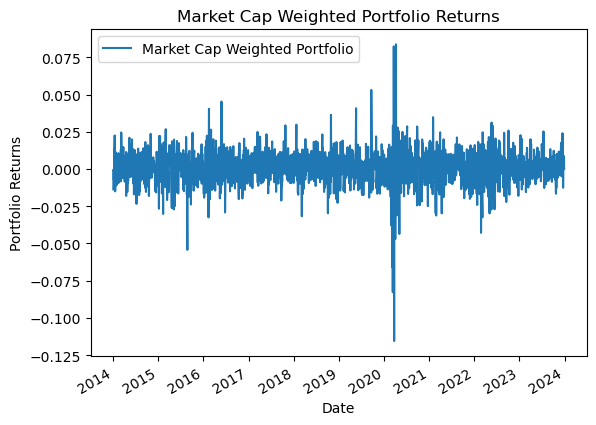

In [23]:
market_cap_returns.plot(label = 'Market Cap Weighted Portfolio')
plt.title('Market Cap Weighted Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Portfolio Returns')
plt.legend()
plt.show()

MINIMUM VARIANCE PORTFOLIO

In [25]:
def minimum_variance_portfolio (portfolio_data):
    cov_matrix = portfolio_data.pct_change().cov()
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    ones_vector = np.ones(len(portfolio_data.columns))
    weights = inv_cov_matrix.dot(ones_vector)/ones_vector.dot(inv_cov_matrix).dot(ones_vector)
    minimum_var_returns = portfolio_data.pct_change().dot(weights)
    return minimum_var_returns

In [26]:
minimum_var_returns = minimum_variance_portfolio (portfolio_data)
minimum_var_returns

Date
2014-01-01         NaN
2014-01-02   -0.011874
2014-01-03    0.003997
2014-01-06   -0.001076
2014-01-07   -0.008610
                ...   
2023-12-22    0.007805
2023-12-26    0.000362
2023-12-27    0.008362
2023-12-28    0.002605
2023-12-29    0.002165
Length: 2444, dtype: float64

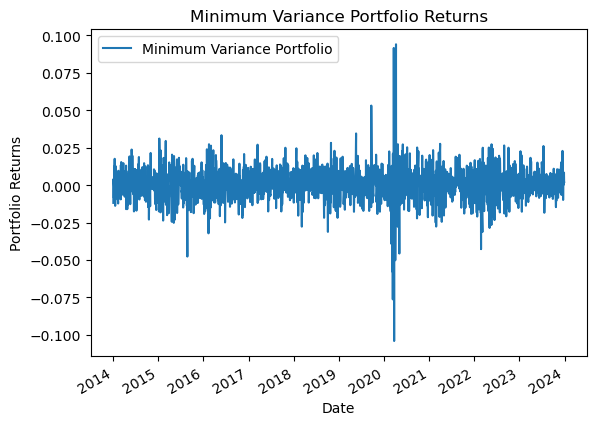

In [27]:
minimum_var_returns.plot(label = 'Minimum Variance Portfolio')
plt.title('Minimum Variance Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Portfolio Returns')
plt.legend()
plt.show()